# West vs. East resuspension rate difference classification

Based on tidal speeds from Jacqui-Lee

In [1]:
import os
os.environ['PROJ_LIB'] = '/home/brogalla/anaconda3/share/proj'

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import datetime
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import pickle
import scipy.io

%matplotlib notebook

Load ANHA12 meshes:

In [4]:
mesh       = nc.Dataset('/ocean/brogalla/GEOTRACES/analysis-birgit/notebooks/ANHA12/ANHA12_mesh1.nc')
mesh_lon   = np.array(mesh.variables['nav_lon'])
mesh_lat   = np.array(mesh.variables['nav_lat'])
mesh_bathy = np.array(mesh.variables['hdept'][0])

cond2      = (mesh_bathy > 0.1)
bathy_masked = np.ma.masked_where(cond2, mesh_bathy)

In [5]:
xmin=1480; xmax=2050
ymin=160;  ymax=800

Load tidal speed array from Jacqui-Lee:

In [6]:
mat         = scipy.io.loadmat('/ocean/brogalla/GEOTRACES/data/mean_tide_speed.mat')
tidal_speed = mat['mean_speed']

ts_mesh     = nc.Dataset('/ocean/brogalla/GEOTRACES/data/hsquare.nc')
ts_lons     = np.array(ts_mesh.variables['nav_lon'])
ts_lats     = np.array(ts_mesh.variables['nav_lat'])

<IPython.core.display.Javascript object>


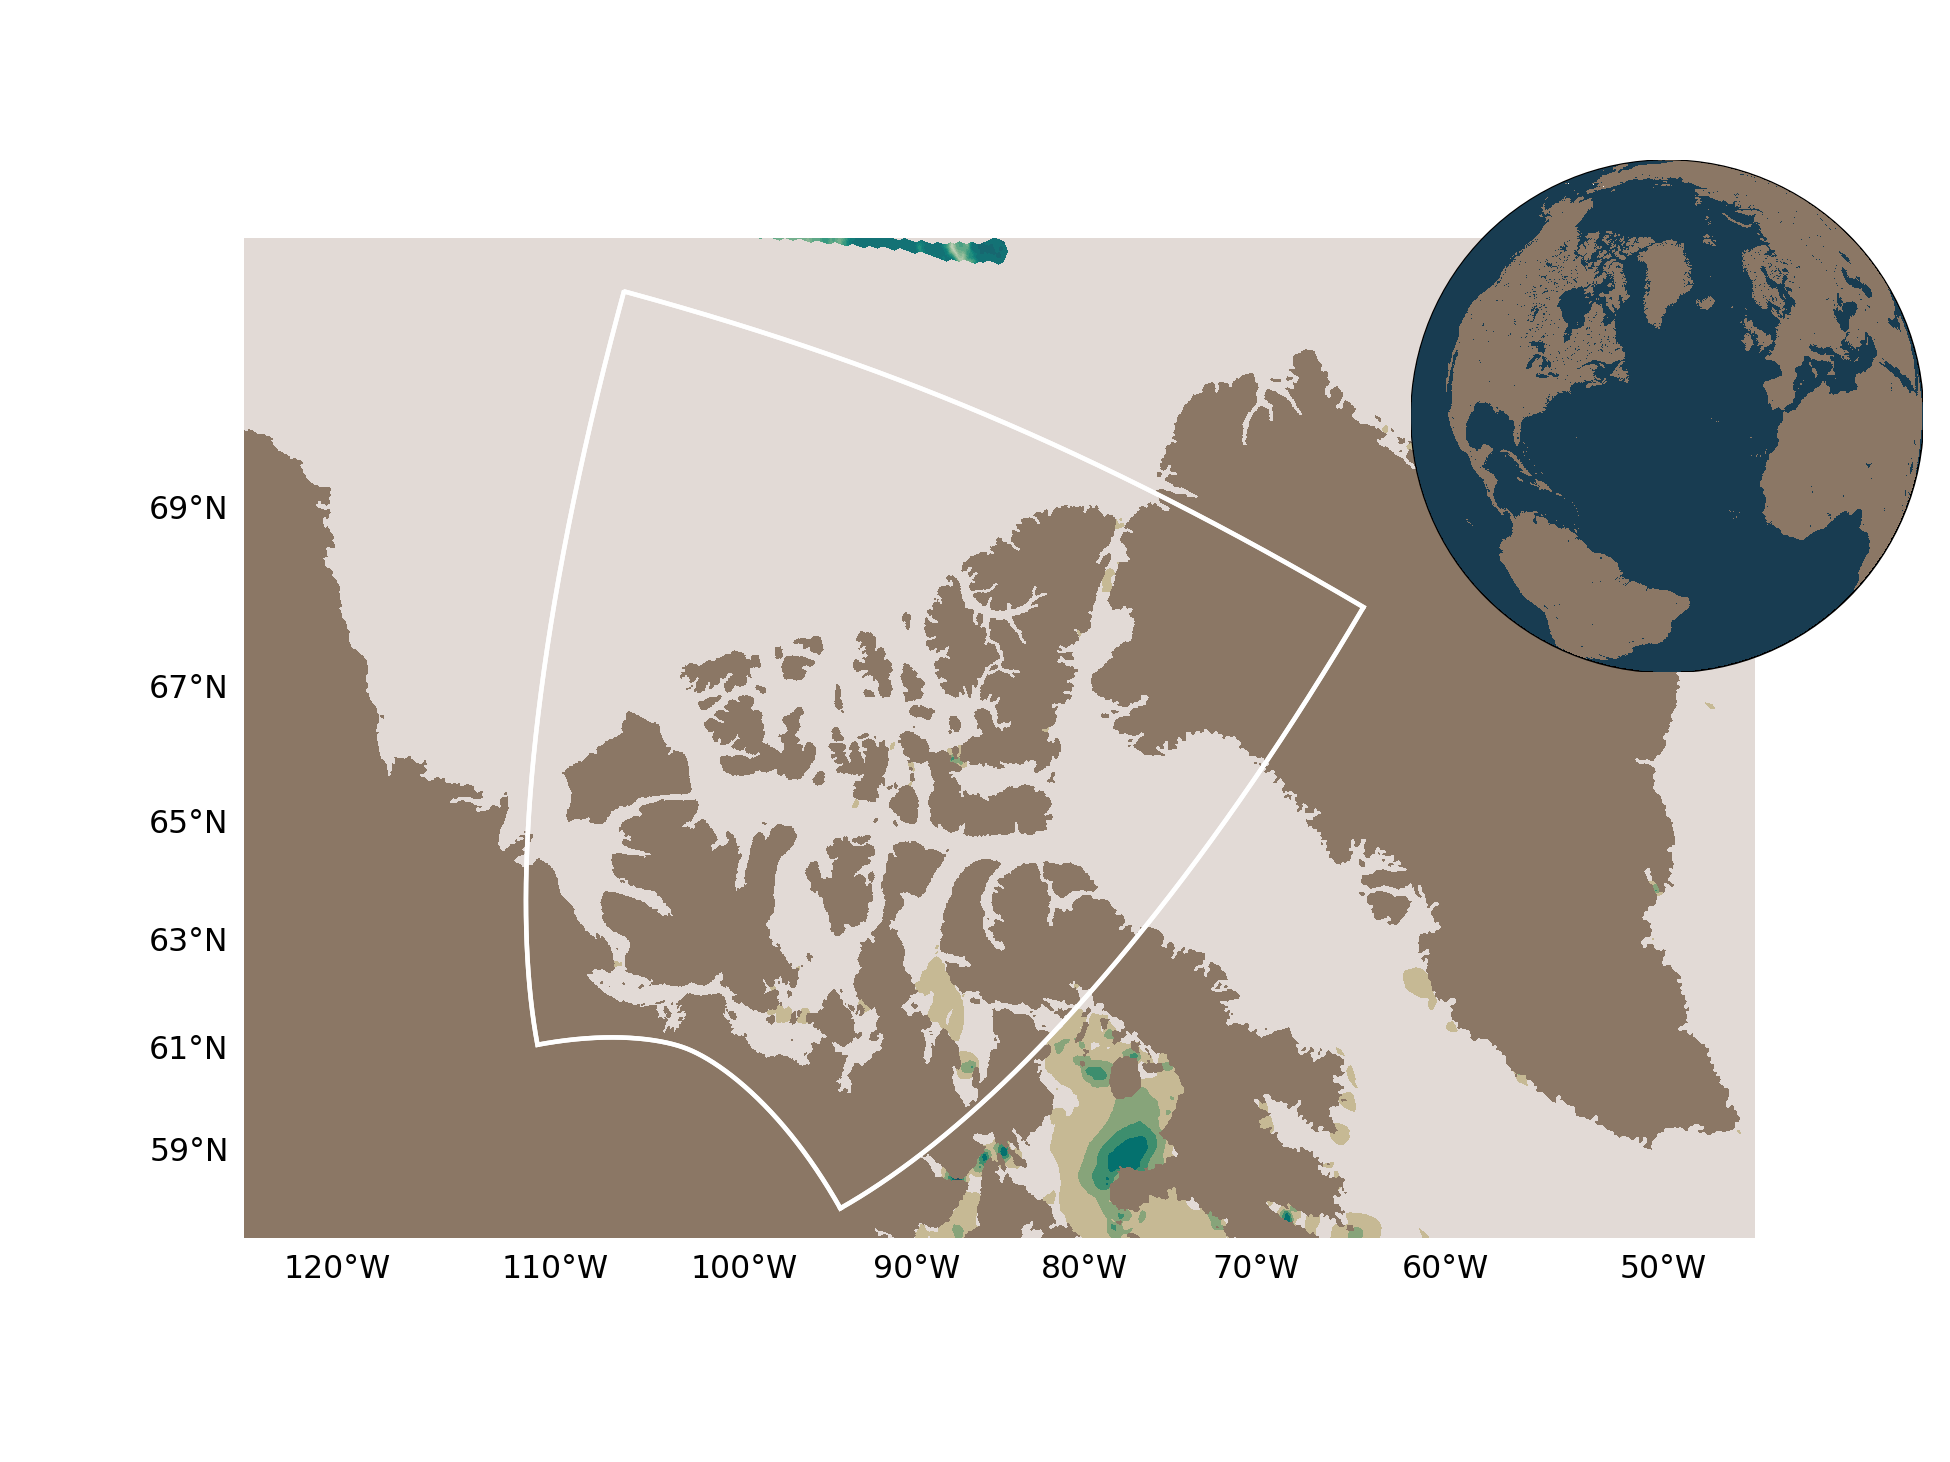

In [27]:
fig, ax1, proj1, ax2, proj2 = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/' + \
                                               'surface-land-map-globe.pickle','rb'))
# Sub-domain map: ---------------------------------------------------------------------------
x_sub, y_sub  = proj1(mesh_lon, mesh_lat) 
proj1.plot(x_sub[xmin:xmax,ymax],   y_sub[xmin:xmax,ymax],   'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[xmin:xmax,ymax].T, y_sub[xmin:xmax,ymax].T, 'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[xmin:xmax,ymin],   y_sub[xmin:xmax,ymin],   'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[xmin:xmax,ymin].T, y_sub[xmin:xmax,ymin].T, 'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[xmin,ymin:ymax],    y_sub[xmin,ymin:ymax],    'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[xmin,ymin:ymax].T,  y_sub[xmin,ymin:ymax].T,  'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[xmax,ymin:ymax],    y_sub[xmax,ymin:ymax],    'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[xmax,ymin:ymax].T,  y_sub[xmax,ymin:ymax].T,  'w-', lw=2.0,zorder=5)

# tidal speed:
x_JL, y_JL = proj1(ts_lons, ts_lats)
proj1.contourf(x_JL, y_JL, tidal_speed, cmap=cmocean.cm.rain)

# fig.savefig('/ocean/brogalla/GEOTRACES/figures/sub-domain.png', bbox_inches='tight')

In [7]:
tidal_stress    = 1100*tidal_speed**2 # missing the drag coefficient
critical_stress = 0.02 # N/m2, Sheng (1984)
Eo = 1e-4 # kg / m2 / s (Clark & Elliot, 1998)

sediment_flux = Eo*((tidal_stress/critical_stress)-1)
sediment_flux[sediment_flux < 0] = 0

/home/brogalla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less
  


Bottom stress:
$$ \tau = \rho C_{D} |u_b| u_b$$
Sediment flux (Wang, 2002):
$$ E = E_o (\frac{|\tau_b|}{\tau_c} - 1)$$
Erosition rate (Lavelle & Mofjeld, 1984):
$$ \mu = \alpha |\tau|^{\eta}$$ where $\alpha$ is 1.9x10$^{-9}$-2.3x10$^{-6}$ and $\eta$ is 1.2-5

In [8]:
print('Minimal erosion rate: ', 1.9e-9*(np.nanmin(tidal_speed**2))**(1.2))
print('Interme erosion rate: ', 1.9e-9*(np.nanmax(tidal_speed**2)))
print('Maximal erosion rate: ', 2.3e-6*(np.nanmax(tidal_speed**2))**(5.0))

Minimal erosion rate:  4.093070560404842e-20
Interme erosion rate:  2.757255746831667e-09
Maximal erosion rate:  1.4802841334332262e-05


<IPython.core.display.Javascript object>


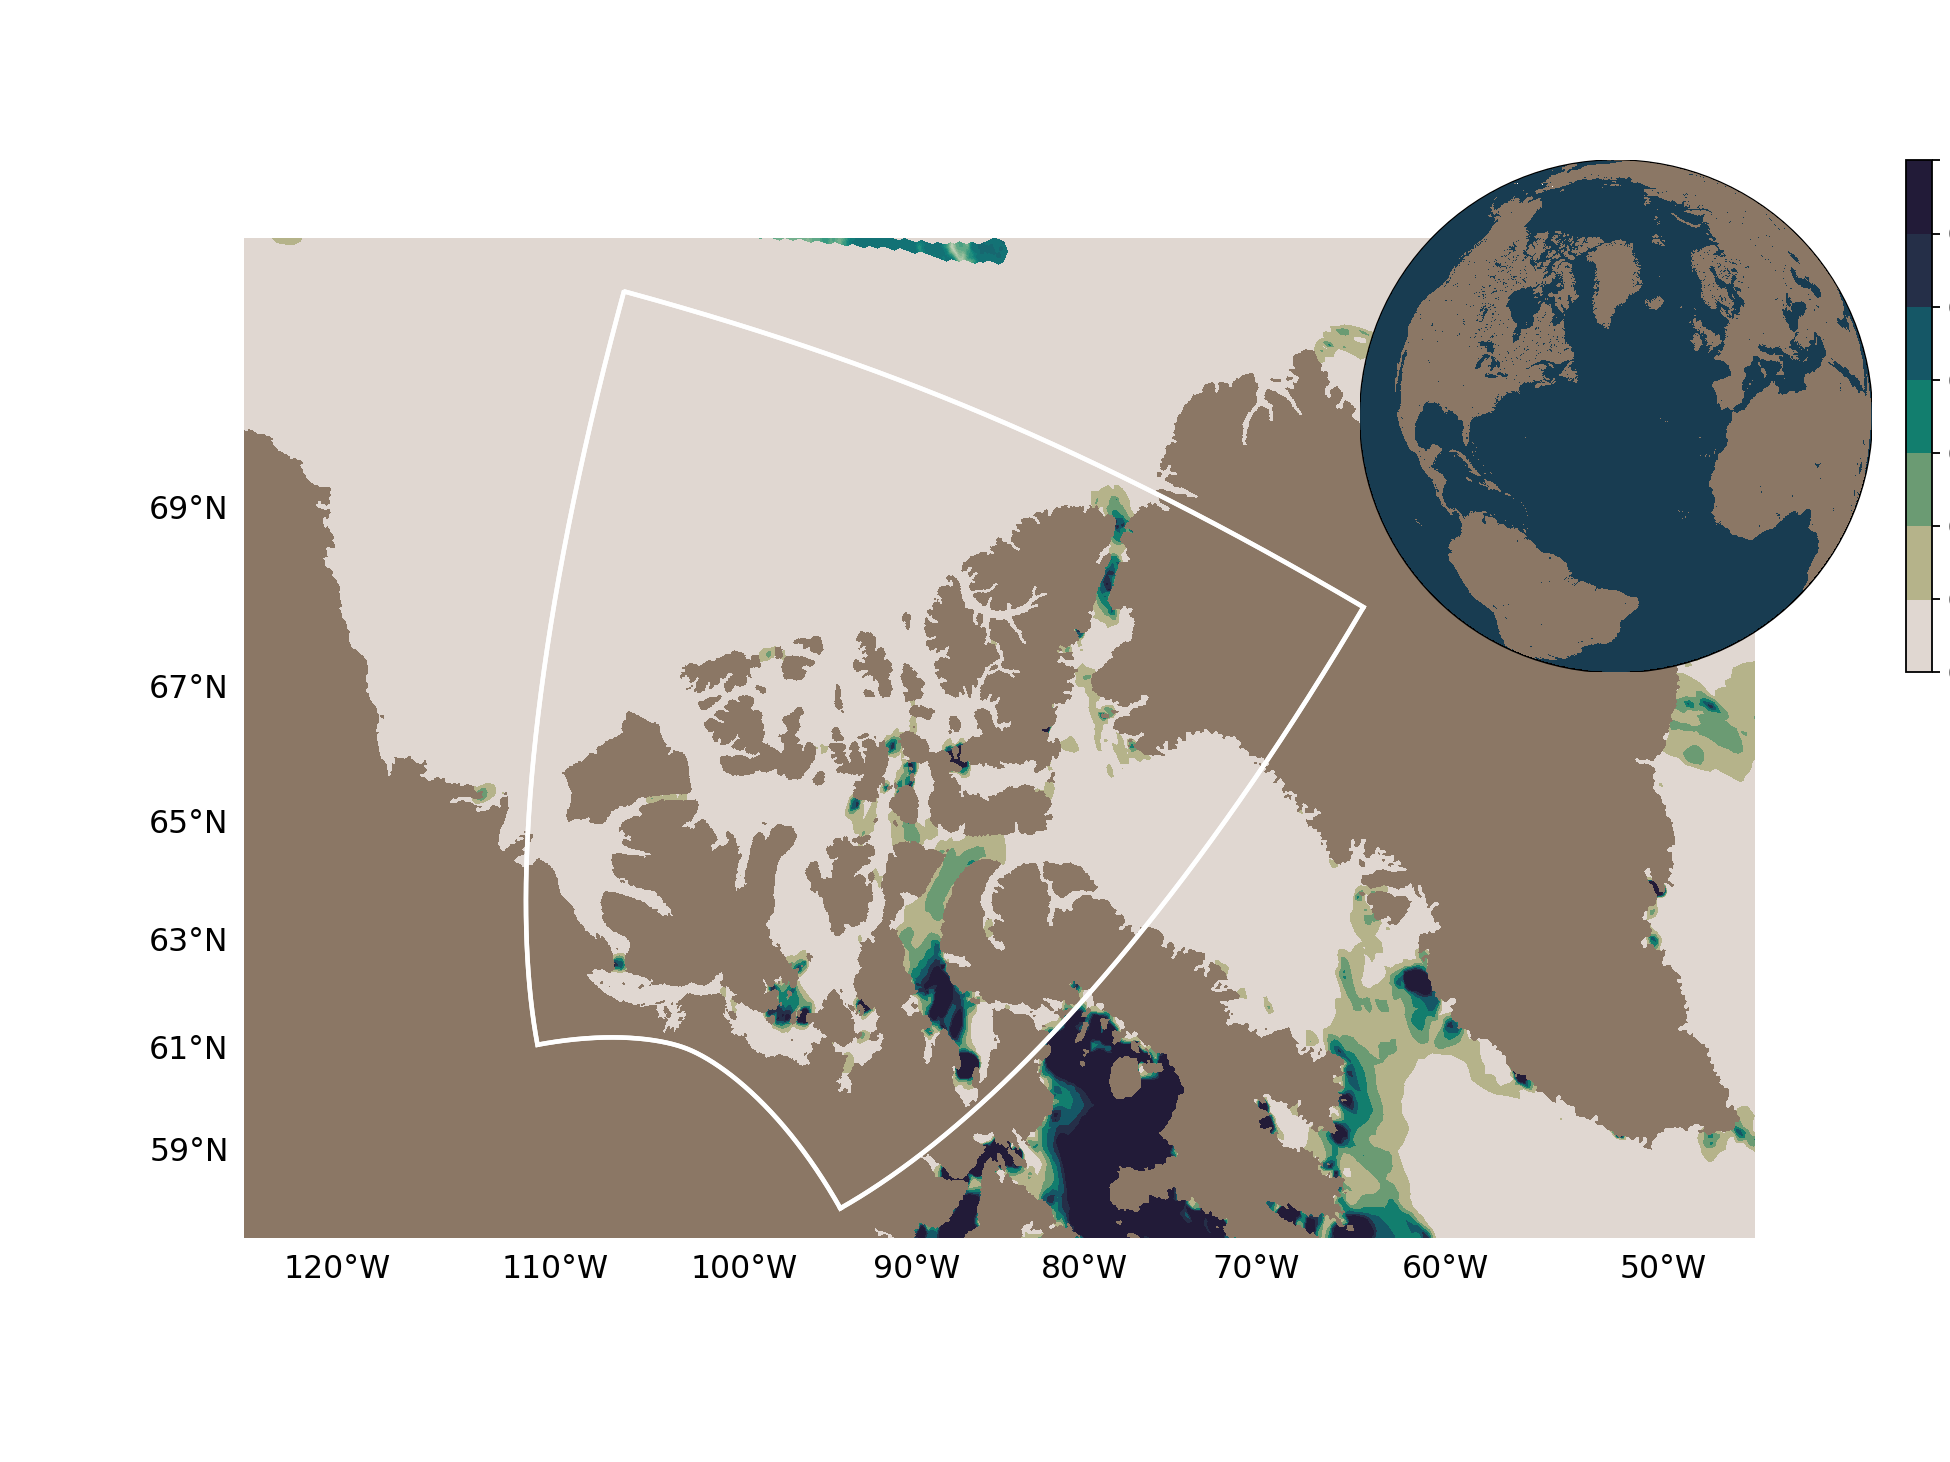

In [44]:
fig, ax1, proj1, ax2, proj2 = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/' + \
                                               'surface-land-map-globe.pickle','rb'))
# Sub-domain map: ---------------------------------------------------------------------------
x_sub, y_sub  = proj1(mesh_lon, mesh_lat) 
proj1.plot(x_sub[xmin:xmax,ymax],   y_sub[xmin:xmax,ymax],   'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[xmin:xmax,ymax].T, y_sub[xmin:xmax,ymax].T, 'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[xmin:xmax,ymin],   y_sub[xmin:xmax,ymin],   'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[xmin:xmax,ymin].T, y_sub[xmin:xmax,ymin].T, 'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[xmin,ymin:ymax],    y_sub[xmin,ymin:ymax],    'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[xmin,ymin:ymax].T,  y_sub[xmin,ymin:ymax].T,  'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[xmax,ymin:ymax],    y_sub[xmax,ymin:ymax],    'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[xmax,ymin:ymax].T,  y_sub[xmax,ymin:ymax].T,  'w-', lw=2.0,zorder=5)

# tidal speed:
x_JL, y_JL = proj1(ts_lons, ts_lats)
CB = proj1.contourf(x_JL, y_JL, sediment_flux, vmin=0, vmax=0.3, levels=[0,0.05,0.1,0.15,0.2,0.25,0.3,10], cmap=cmocean.cm.rain)

cbaxes = fig.add_axes([0.92, 0.16, 0.04, 0.25])
CBar = plt.colorbar(CB, cax=cbaxes, ticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0, 2.0])
# fig.savefig('/ocean/brogalla/GEOTRACES/figures/sub-domain.png', bbox_inches='tight')

### Erosion rate:

In [9]:
tidal_stress     = tidal_speed**2 #proportional to --- missing the constant term in front
log_tidal_stress = np.log10(tidal_stress)

<IPython.core.display.Javascript object>


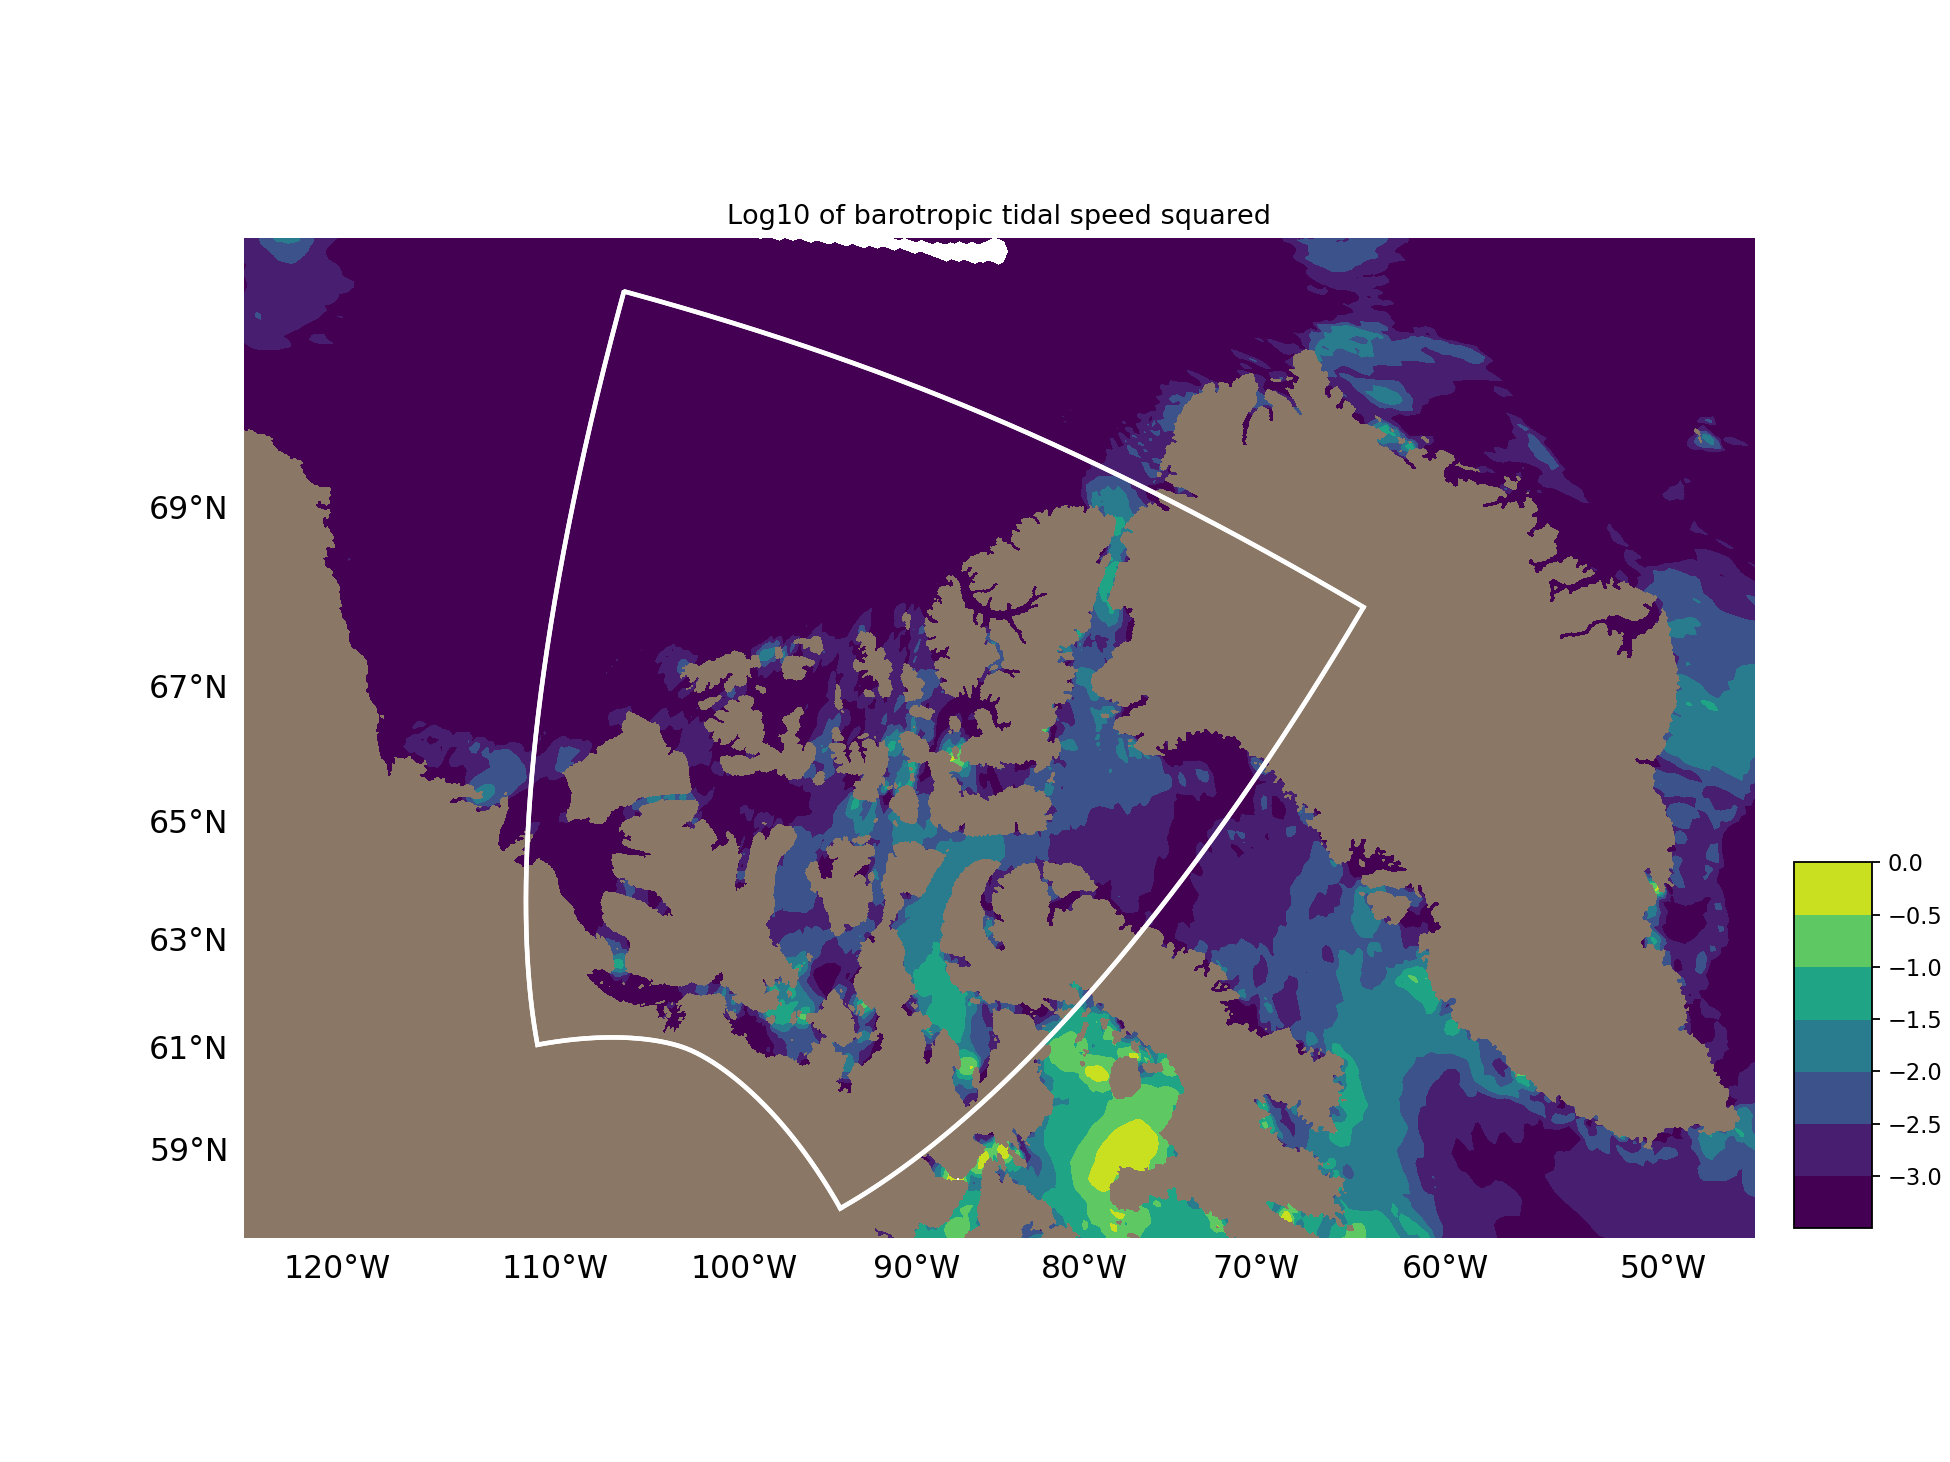

In [34]:
fig, ax1, proj1= pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/' + \
                                               'mn-reference.pickle','rb'))
# Sub-domain map: ---------------------------------------------------------------------------
x_sub, y_sub  = proj1(mesh_lon, mesh_lat) 
proj1.plot(x_sub[xmin:xmax,ymax],   y_sub[xmin:xmax,ymax],   'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[xmin:xmax,ymax].T, y_sub[xmin:xmax,ymax].T, 'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[xmin:xmax,ymin],   y_sub[xmin:xmax,ymin],   'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[xmin:xmax,ymin].T, y_sub[xmin:xmax,ymin].T, 'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[xmin,ymin:ymax],    y_sub[xmin,ymin:ymax],    'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[xmin,ymin:ymax].T,  y_sub[xmin,ymin:ymax].T,  'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[xmax,ymin:ymax],    y_sub[xmax,ymin:ymax],    'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[xmax,ymin:ymax].T,  y_sub[xmax,ymin:ymax].T,  'w-', lw=2.0,zorder=5)

# tidal speed:
x_JL, y_JL = proj1(ts_lons, ts_lats)
# proj1.contourf(x_JL, y_JL, np.zeros(x_JL.shape), vmin=0, vmax=1, cmap=cmocean.cm.gray_r)
CB = proj1.contourf(x_JL, y_JL, log_tidal_stress, vmin=-3, vmax=0, levels=[-12,-3, -2.5, -2, -1.5, -1, -0.5, 0])

ax1.set_title('Log10 of barotropic tidal speed squared')

cbaxes = fig.add_axes([0.92, 0.16, 0.04, 0.25])
CBar = plt.colorbar(CB, cax=cbaxes, ticks=[-3, -2.5, -2, -1.5, -1, -0.5, 0])
# fig.savefig('/ocean/brogalla/GEOTRACES/figures/sub-domain.png', bbox_inches='tight')

### Interpolate

Interpolate ANHA4 to ANHA12 grid:

In [37]:
def interp_np(nav_lon, nav_lat, var_in, lon_ANHA12, lat_ANHA12):
    ''' Interpolate Mn model output from Marco to ANHA12 grid.
        The function is based on the bilinear interpolation in scipy, griddata 
        =======================================================================
            nav_lon, nav_lat        : Mn model lons/lats
            lon_ANHA12, lat_ANHA12  : ANHA12 defined lons/lats
            var_in                  : 2-D Mn model variable
    '''
    from scipy.interpolate import griddata

    LatLonPair = (nav_lon.flatten(), nav_lat.flatten())
    var_out = griddata(LatLonPair, var_in.flatten(), (lon_ANHA12, lat_ANHA12), method='linear')
    # Take nearest neighbour interpolation to fill nans
    var_fill = griddata(LatLonPair, var_in.flatten(), (lon_ANHA12, lat_ANHA12), method='nearest')
    var_out[np.isnan(var_out)] = var_fill[np.isnan(var_out)]
    return var_out

In [38]:
tidal_speed_ANHA12 = interp_np(ts_lons, ts_lats, tidal_speed, mesh_lon, mesh_lat)

In [43]:
tidal_speed_ANHA12[np.isnan(tidal_speed_ANHA12)] = 0

Create classification:

In [44]:
int_tidal_stress     = tidal_speed_ANHA12**2
log_int_tidal_stress = np.log10(int_tidal_stress) 
# normalized_stress  = tidal_speed_square/(np.nanmax(tidal_speed_square[xmin:xmax, ymin:ymax]))

<IPython.core.display.Javascript object>


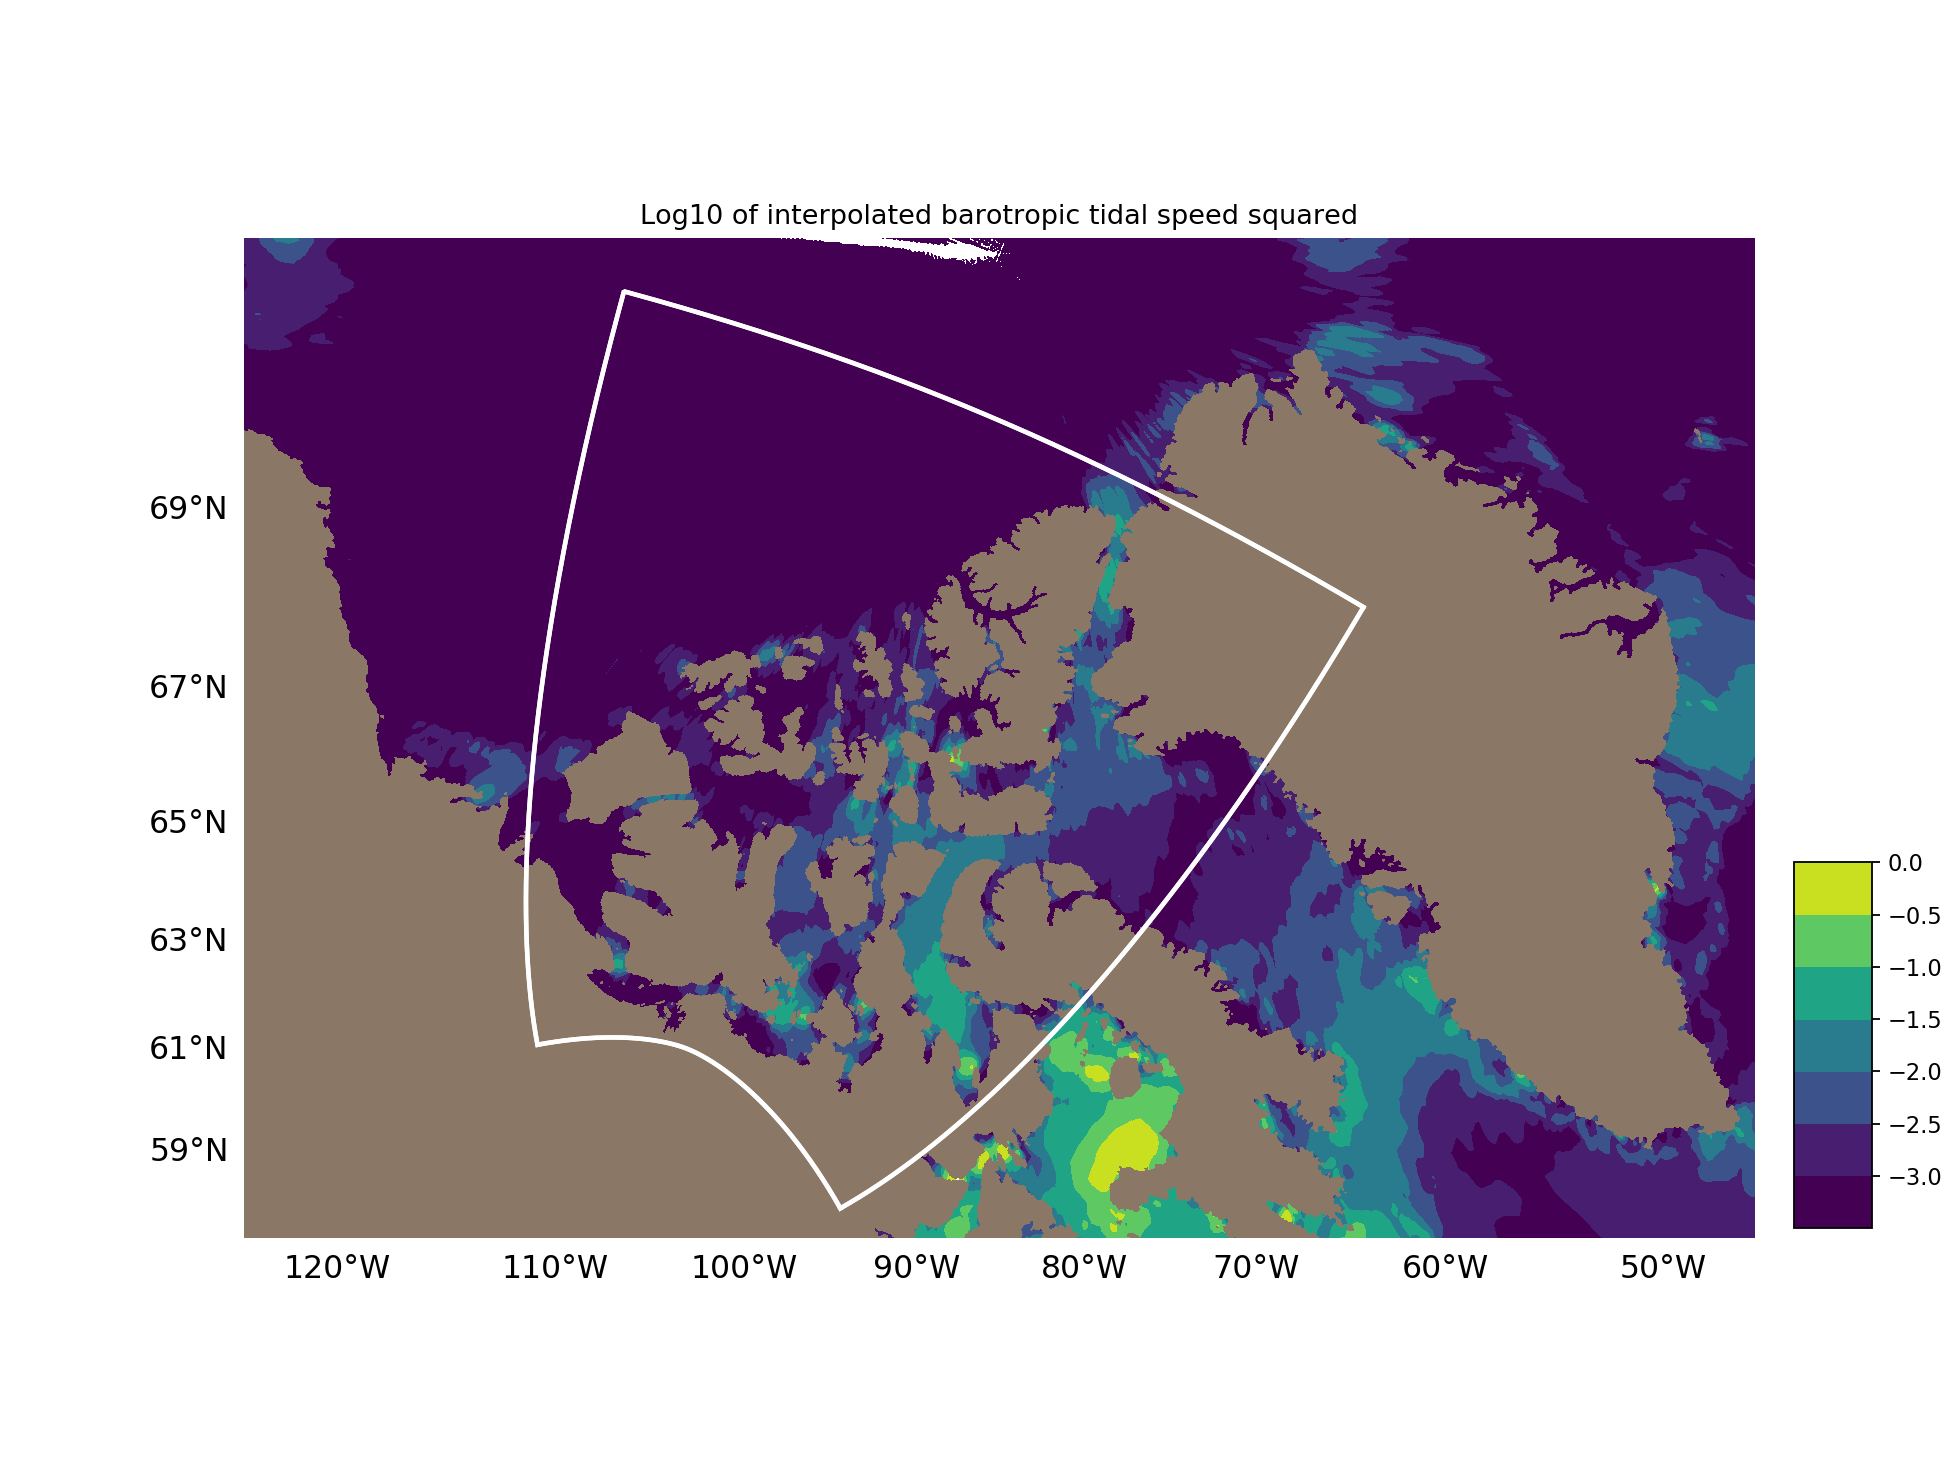

In [45]:
fig, ax1, proj1= pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/' + \
                                               'mn-reference.pickle','rb'))
# Sub-domain map: ---------------------------------------------------------------------------
x_sub, y_sub  = proj1(mesh_lon, mesh_lat) 
proj1.plot(x_sub[xmin:xmax,ymax],   y_sub[xmin:xmax,ymax],   'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[xmin:xmax,ymax].T, y_sub[xmin:xmax,ymax].T, 'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[xmin:xmax,ymin],   y_sub[xmin:xmax,ymin],   'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[xmin:xmax,ymin].T, y_sub[xmin:xmax,ymin].T, 'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[xmin,ymin:ymax],    y_sub[xmin,ymin:ymax],    'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[xmin,ymin:ymax].T,  y_sub[xmin,ymin:ymax].T,  'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[xmax,ymin:ymax],    y_sub[xmax,ymin:ymax],    'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[xmax,ymin:ymax].T,  y_sub[xmax,ymin:ymax].T,  'w-', lw=2.0,zorder=5)

# tidal stress:
CB = proj1.contourf(x_sub, y_sub, log_int_tidal_stress, vmin=-3, vmax=0, \
                    levels=[-12,-3, -2.5, -2, -1.5, -1, -0.5, 0])

ax1.set_title('Log10 of interpolated barotropic tidal speed squared')

cbaxes = fig.add_axes([0.92, 0.16, 0.04, 0.25])
CBar = plt.colorbar(CB, cax=cbaxes, ticks=[-3, -2.5, -2, -1.5, -1, -0.5, 0])
# fig.savefig('/ocean/brogalla/GEOTRACES/figures/sub-domain.png', bbox_inches='tight')

Based on my previous parameterization, I found that the erosion rate should be around a maximum of 8e-9 and a minimum of 0.25e-9 (or smaller) works. This means that tidal stress of 0.05 should be about 8e-9. So, I want the maximum of log10 of erosion rate to be about -8 and low areas to be around -10.

In [46]:
erosion_rate = int_tidal_stress*2e-7

In [48]:
log_erosion_rate = np.log10(erosion_rate)

<IPython.core.display.Javascript object>


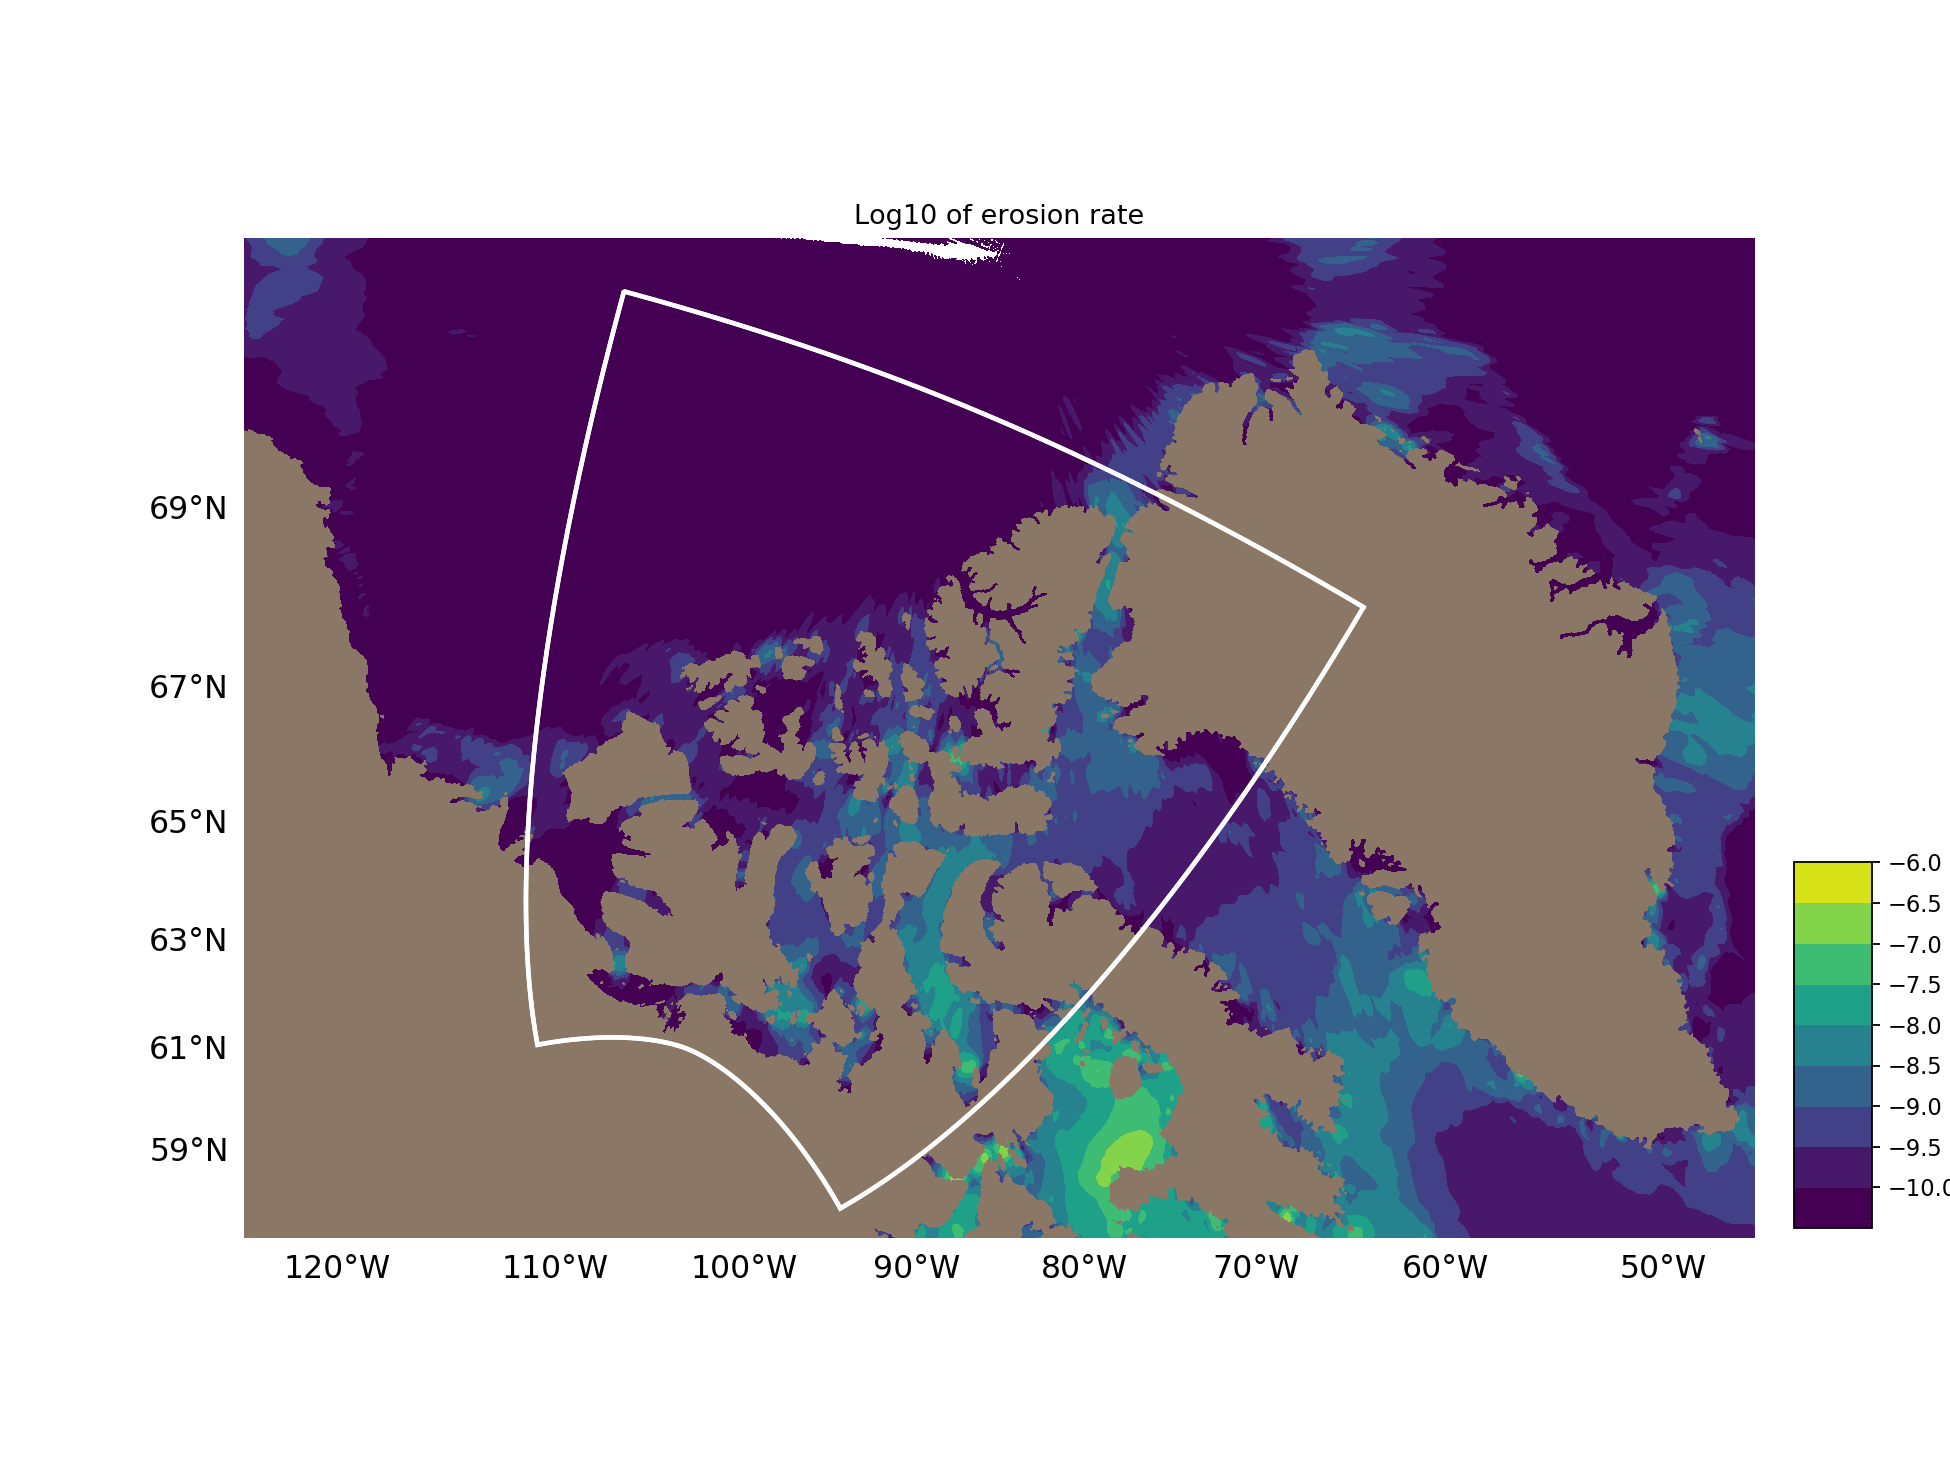

In [49]:
fig, ax1, proj1= pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/' + \
                                               'mn-reference.pickle','rb'))
# Sub-domain map: ---------------------------------------------------------------------------
x_sub, y_sub  = proj1(mesh_lon, mesh_lat) 
proj1.plot(x_sub[xmin:xmax,ymax],   y_sub[xmin:xmax,ymax],   'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[xmin:xmax,ymax].T, y_sub[xmin:xmax,ymax].T, 'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[xmin:xmax,ymin],   y_sub[xmin:xmax,ymin],   'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[xmin:xmax,ymin].T, y_sub[xmin:xmax,ymin].T, 'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[xmin,ymin:ymax],    y_sub[xmin,ymin:ymax],    'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[xmin,ymin:ymax].T,  y_sub[xmin,ymin:ymax].T,  'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[xmax,ymin:ymax],    y_sub[xmax,ymin:ymax],    'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[xmax,ymin:ymax].T,  y_sub[xmax,ymin:ymax].T,  'w-', lw=2.0,zorder=5)

# tidal stress:
CB = proj1.contourf(x_sub, y_sub, log_erosion_rate, vmin=-10, vmax=-6, \
                    levels=[-14, -10, -9.5, -9, -8.5, -8, -7.5, -7, -6.5, -6])

ax1.set_title('Log10 of erosion rate')

cbaxes = fig.add_axes([0.92, 0.16, 0.04, 0.25])
CBar = plt.colorbar(CB, cax=cbaxes, ticks=[-10, -9.5, -9, -8.5, -8, -7.5, -7, -6.5, -6])
# fig.savefig('/ocean/brogalla/GEOTRACES/figures/sub-domain.png', bbox_inches='tight')

# Write to NetCDF file

In [60]:
c   = nc.Dataset('/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12-EXH006_y2015m01d05_gridT.nc','r')
lon = np.array(c.variables['nav_lon'])
lat = np.array(c.variables['nav_lat'])

In [61]:
ncd = nc.Dataset('/ocean/brogalla/GEOTRACES/data/erosion_rate-20200103.nc', 'w', zlib=True)
ncd.createDimension('x',len(c.dimensions['x']))
ncd.createDimension('y',len(c.dimensions['y']))

<class 'netCDF4._netCDF4.Dimension'>: name = 'y', size = 2400

In [62]:
# variables
nav_lat = ncd.createVariable('nav_lat', 'float32', ('y','x'))
nav_lat.long_name = 'Latitude'
nav_lat.units = 'degrees_north'
nav_lat[:] = lat

nav_lon = ncd.createVariable('nav_lon', 'float32', ('y','x'))
nav_lon.long_name = 'Longitude'
nav_lon.units = 'degrees_east'
nav_lon[:] = lon

mn_resus = ncd.createVariable('er_rate', 'float32', ('y','x'))
mn_resus.units = 'NA'
mn_resus.long_name = 'Erosion rate'  
mn_resus.coordinates = 'nav_lon nav_lat'
mn_resus[:] = erosion_rate

In [63]:
ncd.close()

In [64]:
c = nc.Dataset('/ocean/brogalla/GEOTRACES/data/erosion_rate-20200103.nc','r')
print(np.amax(c.variables['er_rate']))
print(np.amin(c.variables['er_rate']))
print(np.average(c.variables['er_rate']))

2.9023744e-07
0.0
1.1144284e-09
